In [ ]:
!pip install tensorflow keras

In [ ]:
from PIL import Image
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

In [ ]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):

      img = Image.open(os.path.join(directory, filename))
      img = img.resize((224, 224))
      img = img.convert('RGB')
      img = np.array(img)/255.0
      images.append(img)
  return images

In [ ]:
tumor_images = load_images('/content/drive/MyDrive/DatasetPP/yes')
no_tumor_images = load_images('/content/drive/MyDrive/DatasetPP/no')

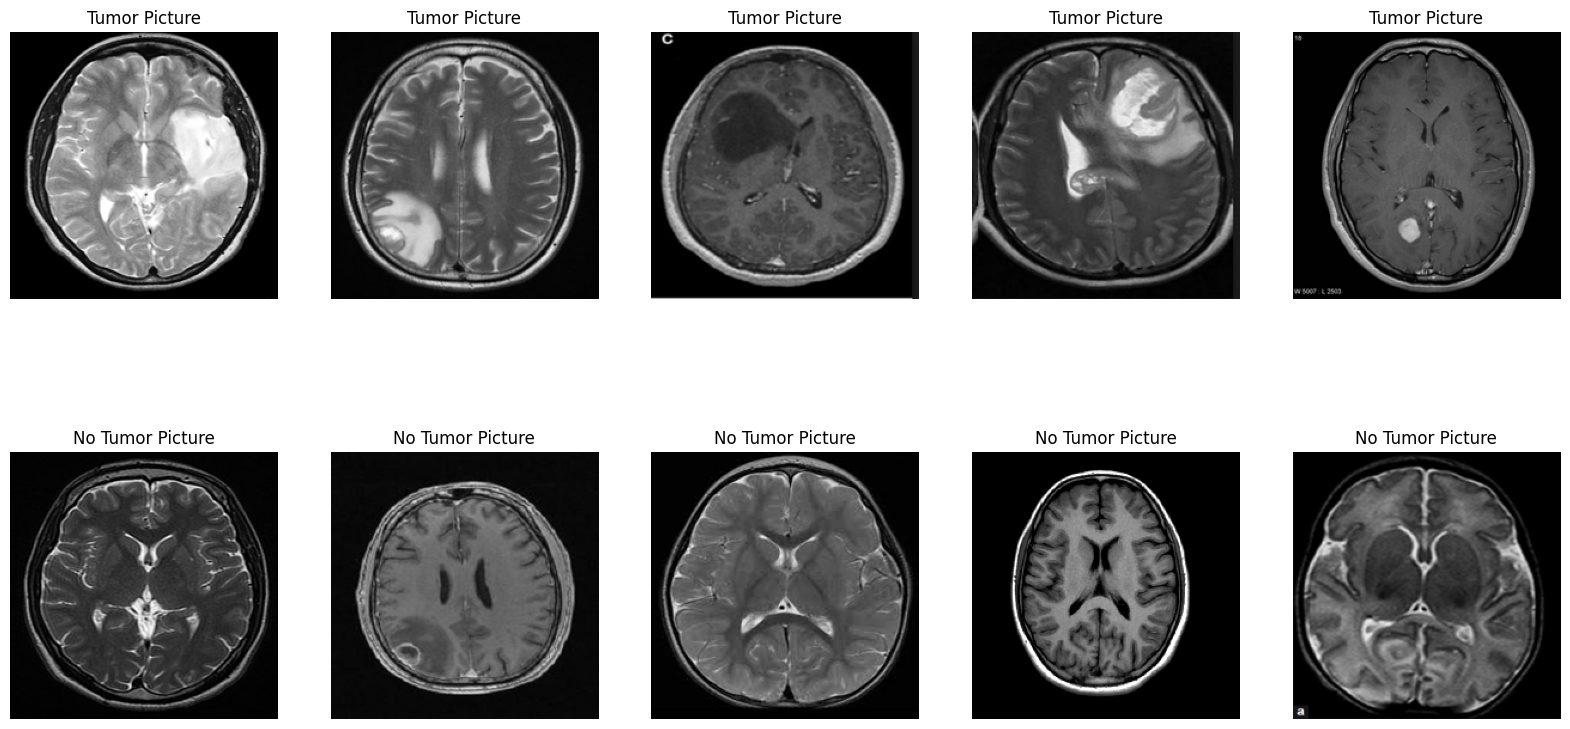

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))
for i in range(5):
  axes[0, i].imshow(tumor_images[i])
  axes[0, i].set_title('Tumor Picture')
  axes[0, i].axis('off')
for i in range(5):
  axes[1, i].imshow(no_tumor_images[i])
  axes[1, i].set_title('No Tumor Picture')
  axes[1, i].axis('off')

plt.show()

In [ ]:
type(tumor_images)
len(tumor_images)

155

In [ ]:
len(no_tumor_images)

98

In [ ]:
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [ ]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [ ]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(tumor_labels)

numpy.ndarray

In [ ]:
data = tumor_images + no_tumor_images
labels = np. concatenate((tumor_labels, no_tumor_labels), axis=0)

In [ ]:
data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.00392157, 0.00392157, 0.00392157],
        

In [ ]:
data[0].shape

(224, 224, 3)

In [ ]:
X = np.array(data)
y = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

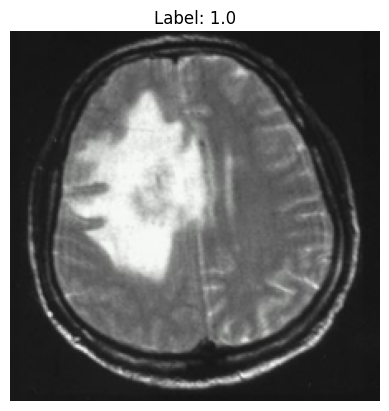

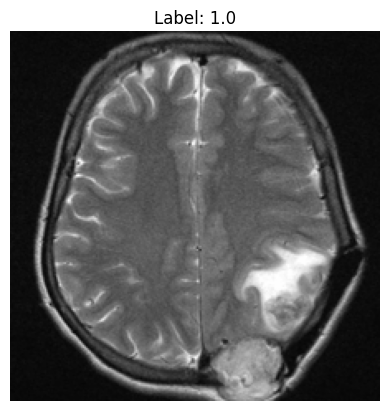

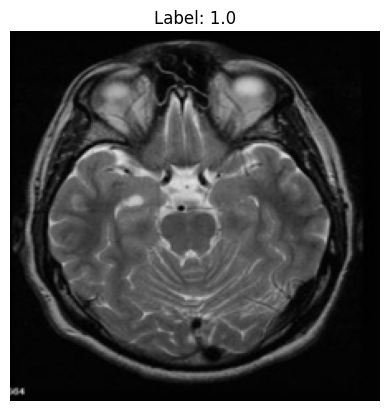

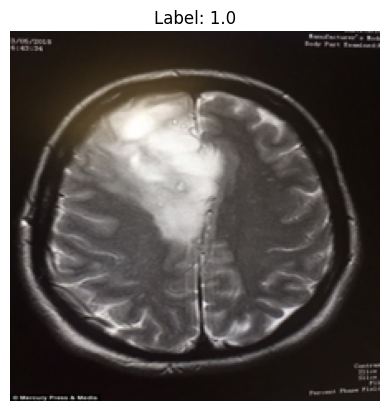

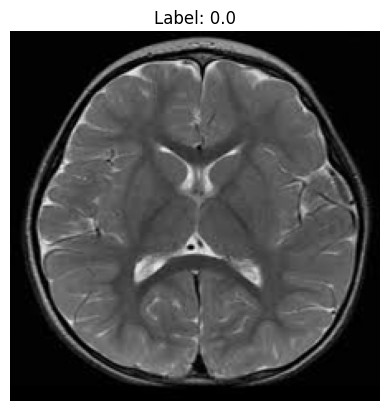

In [ ]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy())
  plt.title('Label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

In [ ]:
validation_size = int (0.1 * 202)
train = train.skip(validation_size)
val = train.take(validation_size)

In [ ]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3), padding = 'valid'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 394272)            0         
                                                                 
 dense_6 (Dense)             (None, 256)               100933888 
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                      

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train, validation_data=val, epochs=10, verbose=1)

Epoch 1/10
6/6 [==============================] - 31s 5s/step - loss: 5.9357 - accuracy: 0.6374 - val_loss: 0.5634 - val_accuracy: 0.7000
Epoch 2/10
6/6 [==============================] - 31s 5s/step - loss: 0.9776 - accuracy: 0.7033 - val_loss: 0.4119 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 29s 5s/step - loss: 0.5821 - accuracy: 0.7527 - val_loss: 0.3007 - val_accuracy: 0.8500
Epoch 4/10
6/6 [==============================] - 29s 5s/step - loss: 0.3359 - accuracy: 0.8736 - val_loss: 0.1889 - val_accuracy: 0.9500
Epoch 5/10
6/6 [==============================] - 29s 5s/step - loss: 0.2277 - accuracy: 0.9176 - val_loss: 0.1031 - val_accuracy: 0.9500
Epoch 6/10
6/6 [==============================] - 28s 5s/step - loss: 0.1376 - accuracy: 0.9670 - val_loss: 0.0362 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 40s 7s/step - loss: 0.0902 - accuracy: 0.9835 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==================

In [ ]:
evaluation = model.evaluate(test)

2/2 [==============================] - 2s 730ms/step - loss: 0.5991 - accuracy: 0.8627


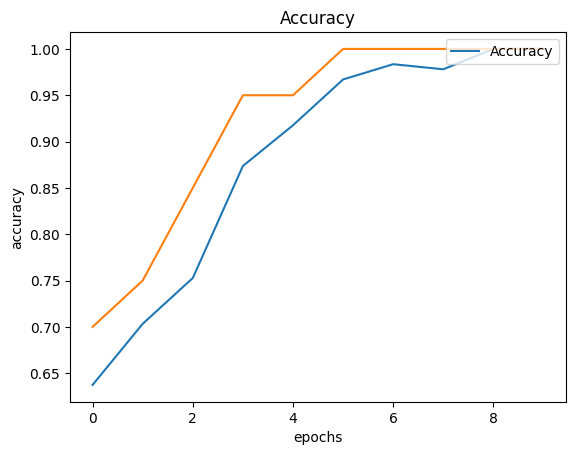

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy'], loc ='upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

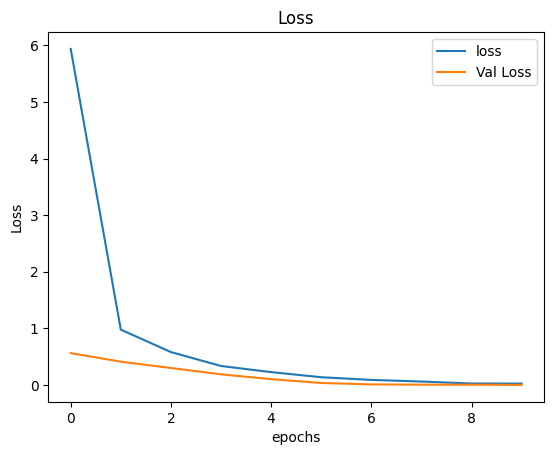

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'],loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()


In [ ]:
def load_uploaded_image(image_bytes):
    img = Image.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
         return "Tumor detected"
    else:
        return "No tumor detected"

Saving 10 no.jpg to 10 no.jpg


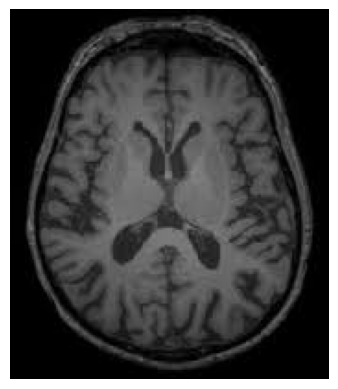

1/1 [==============================] - 0s 113ms/step
No tumor detected


In [ ]:
upload = files.upload()
file_name = list(upload.keys())[0]
image_bytes = upload[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()


result = predict_image(image_bytes)
print(result)